In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정 (Windows: 맑은 고딕, Mac: AppleGothic)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'

# 칼럼 전체 출력시키기
pd.set_option('display.max_columns', None)

# 데이터파일 로딩. 정부문서라서 한글 인코딩 적용
df_shop = pd.read_csv(
    "./data/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv",
    thousands=","  # 숫자사이 콤마 없애고 숫자로 인식시키기
)
# 행,열갯수 출력
df_shop.shape

(540517, 39)

In [2]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540517 entries, 0 to 540516
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     540517 non-null  object 
 1   상호명        540517 non-null  object 
 2   지점명        48544 non-null   object 
 3   상권업종대분류코드  540517 non-null  object 
 4   상권업종대분류명   540517 non-null  object 
 5   상권업종중분류코드  540517 non-null  object 
 6   상권업종중분류명   540517 non-null  object 
 7   상권업종소분류코드  540517 non-null  object 
 8   상권업종소분류명   540517 non-null  object 
 9   표준산업분류코드   540317 non-null  object 
 10  표준산업분류명    540317 non-null  object 
 11  시도코드       540517 non-null  int64  
 12  시도명        540517 non-null  object 
 13  시군구코드      540517 non-null  int64  
 14  시군구명       540517 non-null  object 
 15  행정동코드      540517 non-null  int64  
 16  행정동명       540517 non-null  object 
 17  법정동코드      540517 non-null  int64  
 18  법정동명       540517 non-null  object 
 19  지번코드       540517 non-n

In [3]:
df_shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11650,서초구,11650531,서초4동,1165010800,서초동,1165010800113080025,1,대지,1308.0,25.0,서울특별시 서초구 서초동 1308-25,116504163432,서울특별시 서초구 서초대로73길,40.0,NaN,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11200,성동구,11200790,용답동,1120012200,용답동,1120012200100040011,1,대지,4.0,11.0,서울특별시 성동구 용답동 4-11,112004109494,서울특별시 성동구 용답중앙15길,18.0,NaN,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111015400,장사동,1111015400100800000,1,대지,80.0,NaN,서울특별시 종로구 장사동 80,111104100055,서울특별시 종로구 돈화문로4길,30.0,NaN,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,시계 및 귀금속 소매업,11,서울특별시,11530,구로구,11530760,개봉3동,1153010700,개봉동,1153010700103590008,1,대지,359.0,8.0,서울특별시 구로구 개봉동 359-8,115304148055,서울특별시 구로구 개봉로3길,23.0,NaN,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1,NaN,126.855046,37.486242


In [4]:
df_shop["상권업종소분류명"].value_counts().shape

(247,)

In [5]:
df_shop["상권업종소분류명"].value_counts()

상권업종소분류명
부동산 중개/대리업     25000
백반/한정식         24444
카페             22945
경영 컨설팅업        21113
미용실            19207
               ...  
음반/비디오물 대여업       29
낚시터 운영업           28
비디오방              24
얼음 소매업            23
캠핑/글램핑            14
Name: count, Length: 247, dtype: int64

In [6]:
df_cafe = df_shop.query('상권업종소분류명 == "카페"')
df_cafe

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28.0,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122.0,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
29,MA010120220800000302,한옥,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111012800,관훈동,1111012800100640000,1,대지,64.0,NaN,서울특별시 종로구 관훈동 64,111104100248,서울특별시 종로구 인사동12길,9.0,NaN,1111012800100640000013474,NaN,서울특별시 종로구 인사동12길 9,110300,3146,NaN,1,NaN,126.984797,37.574601
66,MA010120220800001558,화동커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11110,종로구,11110540,삼청동,1111014300,화동,1111014300101380021,1,대지,138.0,21.0,서울특별시 종로구 화동 138-21,111104100236,서울특별시 종로구 율곡로3길,82.0,NaN,1111014300101380021026977,NaN,서울특별시 종로구 율곡로3길 82,110230,3061,NaN,NaN,NaN,126.982271,37.579313
73,MA010120220800001379,우궁옛날전통찻집,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111013600,인사동,1111013600100100000,1,대지,10.0,NaN,서울특별시 종로구 인사동 10,111104100253,서울특별시 종로구 인사동4길,9.0,NaN,1111013600100100000016210,NaN,서울특별시 종로구 인사동4길 9,110290,3148,NaN,NaN,NaN,126.986654,37.573231
97,MA010120220800000971,상록,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111013700,낙원동,1111013700102360001,1,대지,236.0,1.0,서울특별시 종로구 낙원동 236-1,111104100310,서울특별시 종로구 종로17길,52.0,NaN,1111013700102380000013915,NaN,서울특별시 종로구 종로17길 52,110320,3140,NaN,NaN,NaN,126.988556,37.572430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,MA0106202201A0056383,이디야,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11680,강남구,11680531,논현2동,1168010800,논현동,1168010800100890022,1,대지,89.0,22.0,서울특별시 강남구 논현동 89-22,116803122011,서울특별시 강남구 학동로,219.0,NaN,1168010800100890022006577,NaN,서울특별시 강남구 학동로 219,135818,6053,NaN,NaN,NaN,127.033119,37.514996
540460,MA0106202201A0056990,커피트립,NaN,I2,음식,I212,비알코올,I21201,카페,I56111,한식 일반 음식점업,11,서울특별시,11440,마포구,11440700,망원2동,1144012300,망원동,1144012300104320003,1,대지,432.0,3.0,서울특별시 마포구 망원동 432-3,114403113008,서울특별시 마포구 방울내로,54.0,NaN,1144012300104320003022719,시나아트빌,서울특별시 마포구 방울내로 54,121825,3959,NaN,NaN,NaN,126.901342,37.559199
540482,MA0101202502A0103021,메가엠지씨커피쌍문세라믹점,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11320,도봉구,11320670,쌍문2동,1132010500,쌍문동,1132010500100190015,1,대지,19.0,15.0,서울특별시 도봉구 쌍문동 19-15,113203109001,서울특별시 도봉구 도당로,14.0,NaN,1132010500100190015007350,다보빌딩,서울특별시 도봉구 도당로 14,132858,1393,NaN,1,NaN,127.035167,37.659497
540495,MA0101202502A0109064,투썸플레이스신정뉴타운점,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11470,양천구,11470610,신월6동,1147010300,신월동,1147010300105500003,1,대지,550.0,3.0,서울특별시 양천구 신월동 550-3,114703114010,서울특별시 양천구 신월로,164.0,NaN,1147010300105500003000001,승일뷰티타워,서울특별시 양천구 신월로 164,158841,8064,NaN,NaN,NaN,126.842022,37.517760


- 스타벅스를 찾아라 (스타벅스가 어느컬럼에있을까)
- 상호명 컬럼이 유리(스타벅스,스타벅스가 포함된 이름)

In [9]:
# 상호명이 스타벅스
df_shop.query('상호명 == "스타벅스"').shape

(2, 39)

In [10]:
df_shop.query('상호명 == "스타벅스"')

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
90540,MA010120220803106965,스타벅스,코리아,M1,과학·기술,M107,본사·경영 컨설팅,M10703,경영 컨설팅업,M71531,경영 컨설팅업,11,서울특별시,11110,종로구,11110615,종로1.2.3.4가동,1111012500,중학동,1111012500100190000,1,대지,19.0,NaN,서울특별시 종로구 중학동 19,111104100312,서울특별시 종로구 종로1길,50.0,NaN,1111012500100620000000001,NaN,서울특별시 종로구 종로1길 50,110785,3142,NaN,2,NaN,126.979024,37.574726
528369,MA0106202410A0639542,스타벅스,NaN,G2,소매,G212,기타 생활용품 소매,G21202,주방/가정용품 소매업,G47599,그 외 기타 분류 안된 가정용품 소매업,11,서울특별시,11140,중구,11140520,소공동,1114016800,순화동,1114016800100010170,1,대지,1.0,170.0,서울특별시 중구 순화동 1-170,111403000008,서울특별시 중구 통일로,92.0,NaN,1114016800100010170022326,케이지타워,서울특별시 중구 통일로 92,100712,4517,NaN,15,NaN,126.969225,37.563588


In [28]:
# 상호명에 스타벅스가 포함된것
stb = df_shop["상호명"].str.contains("메가커피")
stb.sum()

42

In [29]:
df_shop[stb]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
11397,MA010120220800186190,식빵은여기메가커피,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11710,송파구,11710710,잠실6동,1171010200,신천동,1171010200100080000,1,대지,8.0,NaN,서울특별시 송파구 신천동 8,117103123023,서울특별시 송파구 올림픽로,265.0,NaN,1171010200100030000000001,잠실동잠실역지하도상가,서울특별시 송파구 올림픽로 265,138934,5510,NaN,NaN,NaN,127.100668,37.513453
34455,MA010120220800505619,메가커피우,장산점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11500,강서구,11500611,발산1동,1150010600,내발산동,1150010600107230008,1,대지,723.0,8.0,서울특별시 강서구 내발산동 723-8,115004145052,서울특별시 강서구 강서로45길,6.0,NaN,1150010600107230008009245,좌,서울특별시 강서구 강서로45길 6,157835,7639,NaN,1,NaN,126.835813,37.548097
79183,MA010120220802241927,메가커피,마곡점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107570003,1,대지,757.0,3.0,서울특별시 강서구 마곡동 757-3,115003155059,서울특별시 강서구 마곡중앙5로1길,20.0,NaN,1150010500107570003000001,마곡나루역보타닉비즈타워,서울특별시 강서구 마곡중앙5로1길 20,157805,7788,NaN,1,NaN,126.826712,37.568672
82047,MA010120220802678209,메가커피문정,아이파크점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11710,송파구,11710642,문정2동,1171010800,문정동,1171010800106520005,1,대지,652.0,5.0,서울특별시 송파구 문정동 652-5,117104853400,서울특별시 송파구 법원로4길,6.0,NaN,1171010800100000000000002,문정아이파크,서울특별시 송파구 법원로4길 6,138888,5855,NaN,NaN,NaN,127.122108,37.482312
89278,MA010120220803145703,메가커피현대,시장점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11620,관악구,11620565,성현동,1162010100,봉천동,1162010100104640002,1,대지,464.0,2.0,서울특별시 관악구 봉천동 464-2,116203120009,서울특별시 관악구 은천로,113.0,NaN,1162010100104640002033874,NaN,서울특별시 관악구 은천로 113,151825,8729,NaN,1,NaN,126.947863,37.486959
95297,MA010120220803387874,메가커피신곡,시장점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11470,양천구,11470590,신월4동,1147010300,신월동,1147010300105370008,1,대지,537.0,8.0,서울특별시 양천구 신월동 537-8,114703114010,서울특별시 양천구 신월로,175.0,NaN,1147010300105370008011026,NaN,서울특별시 양천구 신월로 175,158840,8030,NaN,1,NaN,126.842540,37.518842
141402,MA010120220804156243,메가커피신도림역점,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11530,구로구,11530510,신도림동,1153010100,신도림동,1153010100103370000,1,대지,337.0,NaN,서울특별시 구로구 신도림동 337,115303000028,서울특별시 구로구 경인로,661.0,NaN,1153010100103370000000004,신도림푸르지오1차,서울특별시 구로구 경인로 661,152748,8208,NaN,NaN,NaN,126.887767,37.509532
141793,MA010120220804149613,메가커피,장안점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11230,동대문구,11230660,장안2동,1123010600,장안동,1123010600103660001,1,대지,366.0,1.0,서울특별시 동대문구 장안동 366-1,112303105012,서울특별시 동대문구 장한로,116.0,NaN,1123010600103660001016482,풍양빌딩,서울특별시 동대문구 장한로 116,130840,2639,NaN,1,NaN,127.071053,37.570742
166339,MA010120220804461630,메가커피지하도점,강남역,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11680,강남구,11680640,역삼1동,1168010100,역삼동,1168010100108210000,1,대지,821.0,NaN,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101.0,NaN,1168010100108210001000001,강남역지하도상가,서울특별시 강남구 테헤란로 101,135933,6134,NaN,NaN,NaN,127.028034,37.498662
177125,MA010120220804968967,메가커피잠실레이크,팰리스점,I2,음식,I212,비알코올,I21201,카페,I56221,커피 전문점,11,서울특별시,11710,송파구,11710610,삼전동,1171010600,삼전동,1171010600100220002,1,대지,22.0,2.0,서울특별시 송파구 삼전동 22-2,117103123009,서울특별시 송파구 석촌호수로,140.0,NaN,1171010600100220017000001,잠실레이크타워,서울특별시 송파구 석촌호수로 140,138837,5600,NaN,1,NaN,127.092505,37.507018


In [30]:
df_shop.loc[89278]

상가업소번호            MA010120220803145703
상호명                             메가커피현대
지점명                                시장점
상권업종대분류코드                           I2
상권업종대분류명                            음식
상권업종중분류코드                         I212
상권업종중분류명                         비알코올 
상권업종소분류코드                       I21201
상권업종소분류명                            카페
표준산업분류코드                        I56221
표준산업분류명                         커피 전문점
시도코드                                11
시도명                              서울특별시
시군구코드                            11620
시군구명                               관악구
행정동코드                         11620565
행정동명                               성현동
법정동코드                       1162010100
법정동명                               봉천동
지번코드               1162010100104640002
대지구분코드                               1
대지구분명                               대지
지번본번지                            464.0
지번부번지                              2.0
지번주소               서울특별시 관악구 봉천동 464-2
도로명코드                    

C:\Users\dlsgh\AppData\Local\Temp\ipykernel_41312\828989371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cafe['구'] = df_cafe['시군구명'].str.split().str[2] #구


<Axes: >

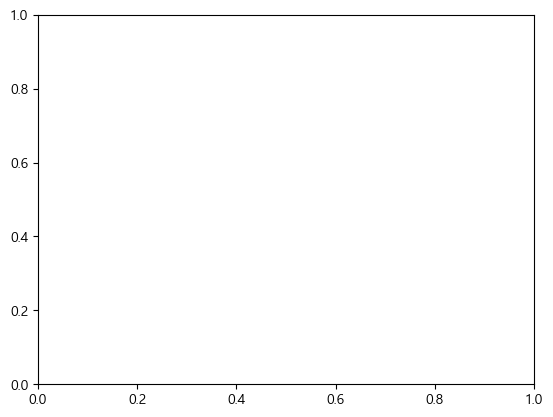

In [36]:
import seaborn as sns
sns.scatterplot(data = df_cafe, 
                x = '경도', y = '위도',hue='구')